In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

In [3]:
## Read in the random distributions of the number of concordant and conflicting interactions after 100 iteration of degree-preserving rewiring

## Concordant Interactions
agree=list()
with open("ConcordantInteractions100Random.txt") as file:
    for line in file:
        line=line.strip()
        agree.append(float(line))

## Conflicting Interactions
conflicting=list()
with open("ConflictingInteractions100Random.txt") as file:
    for line in file:
        line=line.strip()
        conflicting.append(float(line))

Note that the csv file "InteractionAgreement.csv", contains the interactions found in our differential network. However, in this case we only considered an interaction to be emerging or vanishing if both of the proteins are up-regulated or down-regulated respectively. In the case, where only a single protein was seen regulated, these were considered as neutral. 

In [ ]:
## Read in the interactions in our differential network
## Only keeping the proteins having Concordant or Conflicting Interactions. Ignoring neutral represented as 'n'
DiffPPIN=pd.read_csv("InteractionAgreement.csv")
## Filter out neutral interactions
DiffPPIN=DiffPPIN[DiffPPIN["Type"]!='n'].reset_index(drop=True)

print("Differential PPIN")
t=Counter(DiffPPIN['Type'])
print("concordant:",t['+']+t["-"],"|","conflicting:",t['conflicting'])

print("Random")
print("concordant:",np.mean(agree),"|","conflicting:",np.mean(conflicting))

Differential PPIN
concordant: 1047 | conflicting: 964
Random
concordant: 1004.12 | conflicting: 1006.88


The values above represent the number of concordant and conflicting interactions seen in our differential network, compared to the mean number of concordant and conflicting interactions in 100 iteration of degree-preserving rewiring.

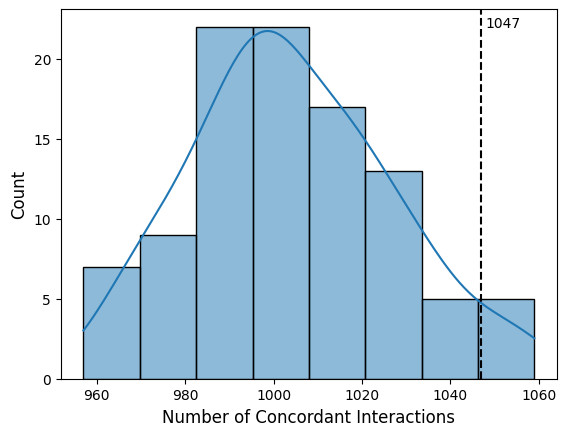

In [13]:
## Plot and test for concordant interactions
sns.histplot(x=agree,kde=True)
plt.axvline(x=1047, color='black', linestyle='--')
plt.text(1048, 22, '1047')
plt.xlabel("Number of Concordant Interactions",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.savefig("ConcordantRand.png",dpi=400)

In [ ]:
## perform 1-sample t-test based on the 1047 concordant interactions
t_stat, p_value = ttest_1samp(agree, 1047)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -19.108973286604694, P-value: 5.472449888178909e-35


As the p-value is less than 0.05, we may conclude that the number of concordant interactions in our differential PPIN is significantly different from random.

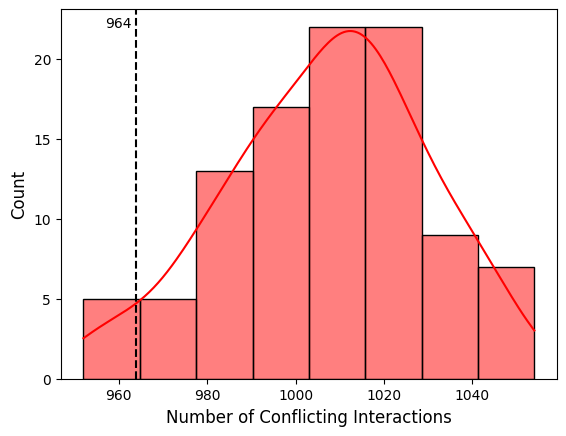

In [15]:
## Plot and test for concordant interactions
sns.histplot(x=conflicting,kde=True,color='red')
plt.axvline(x=964, color='black', linestyle='--')
plt.text(957, 22, '964')
plt.xlabel("Number of Conflicting Interactions",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.savefig("ConflictingRand.png",dpi=400)

In [12]:
## perform 1-sample t-test based on the 964 conflicting interactions
t_stat, p_value = ttest_1samp(conflicting, 964)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 19.108973286604694, P-value: 5.472449888178909e-35


As the p-value is less than 0.05, we may conclude that the number of conflicting interactions in our differential PPIN is significantly different from random.